In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import keyring
from sqlalchemy import create_engine

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lautaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
engine = create_engine(keyring.get_password("aws", "database"))
#Load of table order_reviews from the database
Order_reviews = pd.read_sql("select * from Order_reviews", con=engine) 

In [37]:
Order_reviews['review_comment_message'] = Order_reviews['review_comment_message'].str.replace('[^a-zA-Z]', ' ')
Order_reviews["review_comment_message"] = Order_reviews["review_comment_message"].str.lower()
Order_reviews.dropna(subset="review_comment_message",inplace=True)

C:\Users\Lautaro\AppData\Local\Temp\ipykernel_12772\232394598.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Order_reviews['review_comment_message'] = Order_reviews['review_comment_message'].str.replace('[^a-zA-Z]', ' ')


In [38]:
#Extracting all the comments per score into one long string
score_5_comments=""
for i in Order_reviews[(Order_reviews['review_score']==5)]['review_comment_message']:
    score_5_comments=score_5_comments+i

score_1_comments=""
for i in Order_reviews[(Order_reviews['review_score']==1)]['review_comment_message']:
    score_1_comments=score_1_comments+i

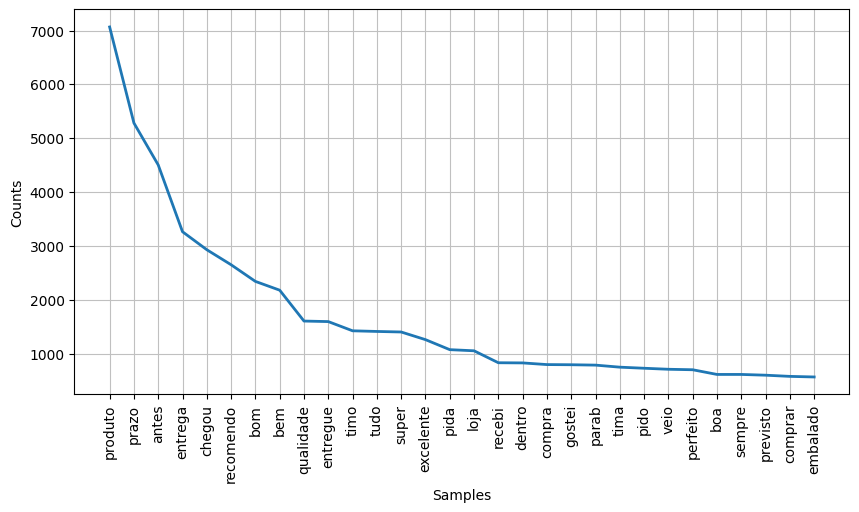

In [39]:
# Text to analize
text = score_5_comments

# Tokenize text into words
words = nltk.word_tokenize(text, language="portuguese")

stop_words = set(stopwords.words('portuguese'))

# Elimination of some proper nouns detected in the comments
proper_nouns = ["lannister", "baratheon", "targaryen", "stark"]

words = [word for word in words if (word.lower() not in stop_words) and (len(word) > 2) and (word not in proper_nouns)]


# Calculate the frequency of words in the text
fdist = FreqDist(words)
fdist_filtered = {key: value for key, value in fdist.items() if value > 1}

# Create a word frequency graph
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
fdist.plot(30, cumulative=False)
plt.show()


In [40]:
pd.DataFrame(fdist_filtered.values(),index=fdist_filtered.keys()).to_csv("../Datasets/Datasets_results/score5_word_counts.csv", )

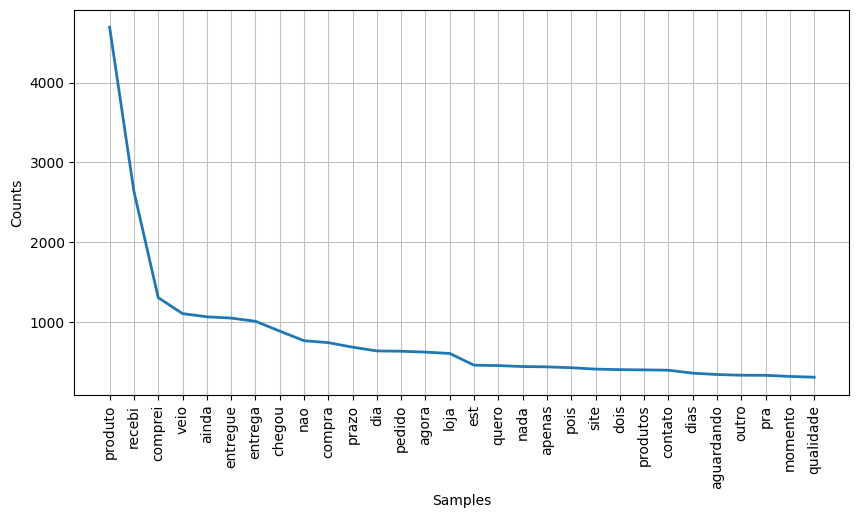

In [41]:
# Text to analize
text = score_1_comments

# Tokenize text into words
words = nltk.word_tokenize(text,language="portuguese")

stop_words = set(stopwords.words('portuguese'))

proper_nouns = ["lannister", "baratheon", "targaryen", "stark"]

words = [word for word in words if (word.lower() not in stop_words) and (len(word) > 2) and (word not in proper_nouns)]

# Calculate the frequency of words in the text
fdist = FreqDist(words)
fdist_filtered = {key: value for key, value in fdist.items() if value > 1}

# Create a word frequency graph
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
fdist.plot(30, cumulative=False)
plt.show()

In [42]:
pd.DataFrame(fdist_filtered.values(),index=fdist_filtered.keys()).to_csv("../Datasets/Datasets_results/score1_word_counts.csv", )